<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<center><h2>Lab 2 - Series con estacionalidad</h2></center>

Tareas:
    
1) Levantar los datos desde el archivo dataset/demanda.csv. Los
mismos fueron extraídos de los datos del informe mensual en
http://portalweb.cammesa.com/memnet1/Pages/descargas.aspx


2) Explorar los datos y visualizar descomposición de datos


3) Modelar con Holt Winters Smoothing con diferentes parámetros


4) Visualizar los resultados y evaluar su poder predictivo,
comparando ambos modelos

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules
DATA_FILE = 'datasets/demanda.csv'
RAW_REPO = 'https://github.com/DiploDatos/AnalisisSeriesTemporales/raw/master/'
if IN_COLAB:
    DATA_FILE = RAW_REPO + DATA_FILE
    !wget -O get-x13as.sh {RAW_REPO + 'get-x13as.sh'}
    !sh get-x13as.sh
    !wget -O plotting.py {RAW_REPO + 'plotting.py'}

In [2]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
green='#00FF00'
orange='#FFA500'
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]


En este trabajo utilizaremos los datos de la demanda eléctrica de la Compañía Administradora del Mercado Mayorista Eléctrico.

In [4]:
data = pd.read_csv(DATA_FILE,index_col='TIPO',parse_dates=True)
#data.index=data.index.to_period(freq='M')
data.columns


Index(['Residencial', 'Comercial', 'Industrial/Comercial Grande', 'TOTAL'], dtype='object')

In [5]:
data.rename(columns={'Industrial/Comercial Grande':'Industrial'}, inplace=True )
data.tail()


,Residencial,Comercial,Industrial,TOTAL
TIPO,,,,
2019-03-01,4004709.444,3044854.983,3072063.284,1.012163e+07
2019-04-01,3652724.519,2892482.731,3029687.889,9.574895e+06
2019-05-01,4356836.823,2973830.213,3055527.035,1.038619e+07
2019-06-01,4816838.191,2937048.667,2897618.673,1.065151e+07
2019-07-01,5704951.016,3288949.873,3035538.422,1.202944e+07


In [6]:
data.describe().round(2)

,Residencial,Comercial,Industrial,TOTAL
count,79.00,79.00,79.00,79.00
mean,4551935.29,3113096.42,3187977.02,10853008.74
std,654164.93,206829.98,124659.74,816874.81
min,3239380.70,2809183.13,2897618.67,9307334.16
25%,3990580.45,2948084.14,3109179.19,10223259.40
50%,4470715.12,3070853.24,3199317.20,10706955.32
75%,5092450.46,3270751.91,3275571.56,11476364.98
max,6193110.21,3606989.07,3460879.97,12607552.72


In [7]:
y1=data['Residencial']
y2=data['Comercial']
y3=data['Industrial']
y4=data['TOTAL']

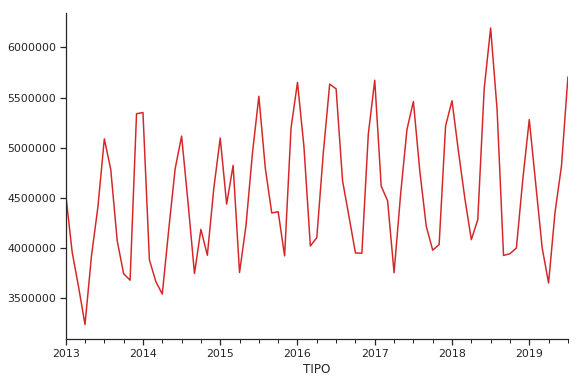

In [8]:
fig, ax= plt.subplots(figsize=(9,6))
y1.plot(color=red);
#y2.plot(color=blue);
#y3.plot(color=green);
#y4.plot(color=orange);
#ax.set_ylabel('Demanda(MW)')
#plt.legend(['Residencial','Comercial','Industrial', 'Total'],loc='best', bbox_to_anchor=(0.9, 0., 0.5, 0.5))
sns.despine()

Se puede ver que la demanda Residencial es mucho mayor a la Comercial e Industrial. Y que no cambia mucho el consumo de pequeños y grandes comercios.

In [9]:
data['month'] = data.index.month
data['year'] = data.index.year

#### Comercial

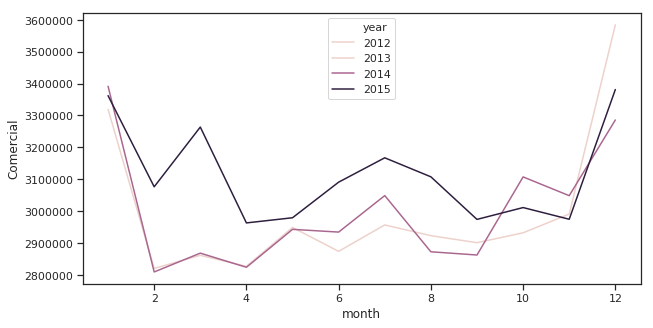

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot('month','Comercial',hue='year', data=data['2013':'2015'], markers='None');

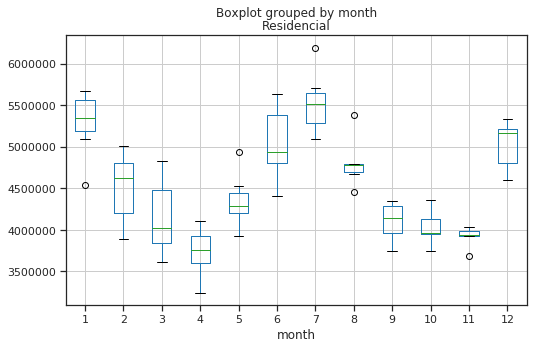

In [13]:
data.boxplot(column='Residencial',by='month',figsize=(8,5));

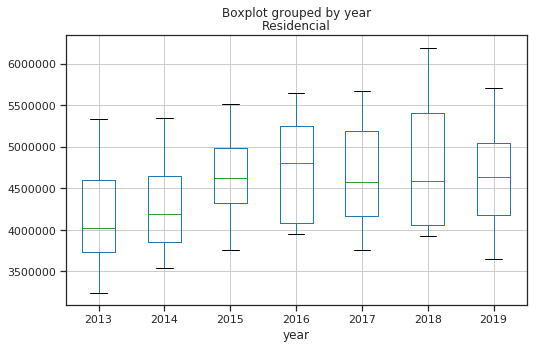

In [14]:
data.boxplot(column='Residencial',by='year',figsize=(8,5));

Notamos que el consumo residencial se mantiene aproximandamente constante a lo largo de los años, con una leve tendencia creciente.

#### Comercial

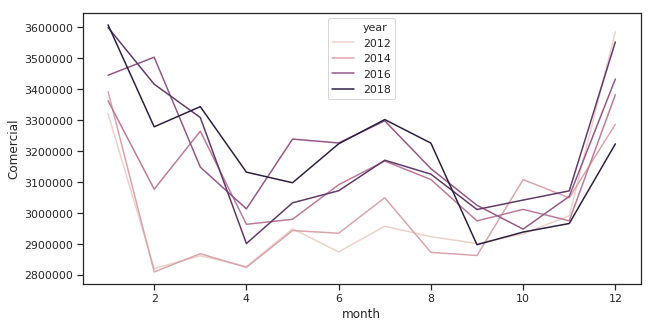

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot('month','Comercial',hue='year', data=data['2013':'2018'], markers='None');

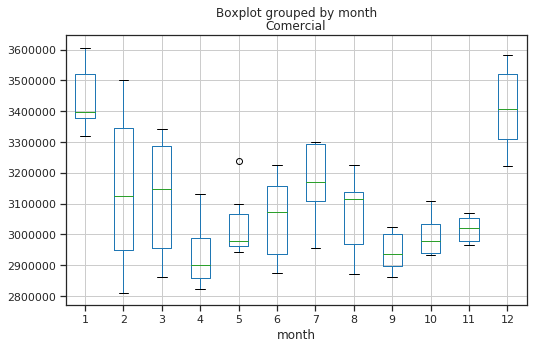

In [16]:
data.boxplot(column='Comercial',by='month',figsize=(8,5));

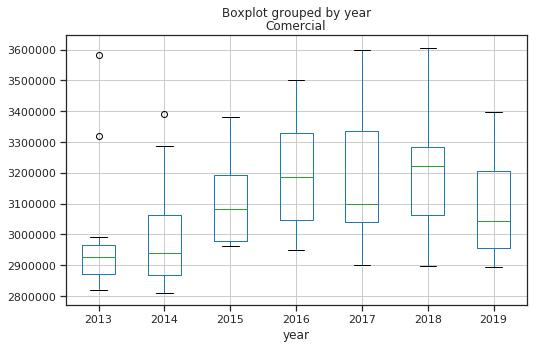

In [17]:
data.boxplot(column='Comercial',by='year',figsize=(8,5));

#### Industrial

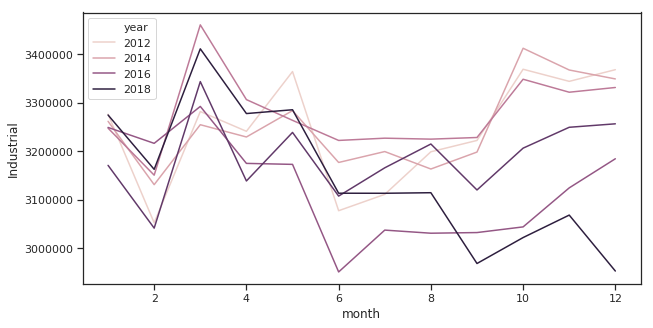

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot('month','Industrial',hue='year', data=data['2013':'2018'], markers='None');

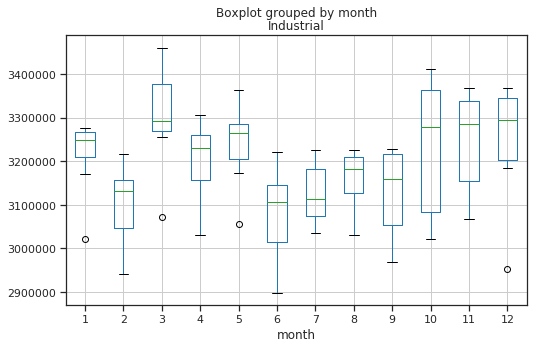

In [19]:
data.boxplot(column='Industrial',by='month',figsize=(8,5));

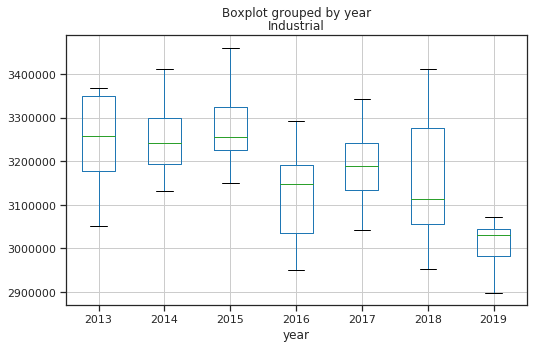

In [20]:
data.boxplot(column='Industrial',by='year',figsize=(8,5));

Se puede visualizar una estacionalidad en los datos residenciales, no de forma tan evidente para el consumo comercial y en menor medida en los registros industriales.

### Descomposición de las series temporales 

#### Residencial

In [21]:
y = data['Residencial'].copy() # Month period series
y.index = y.index.to_period(freq='M')

ts = data['Residencial'] # Day indexed series

In [22]:
decomposition = sm.tsa.x13_arima_analysis(ts,x12path='.')

/home/lucia/anaconda3/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


Para una mejor representación de los componentes:

In [23]:
#You can use the <TT>dir</TT> method to check the available output. 
[attr for attr in dir(decomposition) if not attr.startswith('_')]

['irregular', 'observed', 'plot', 'results', 'seasadj', 'stdout', 'trend']

In [24]:
decomposition.seasadj.tail()

TIPO
2019-03-01    4.357587e+06
2019-04-01    4.448785e+06
2019-05-01    4.517256e+06
2019-06-01    4.351465e+06
2019-07-01    4.685038e+06
Name: seasadj, dtype: float64

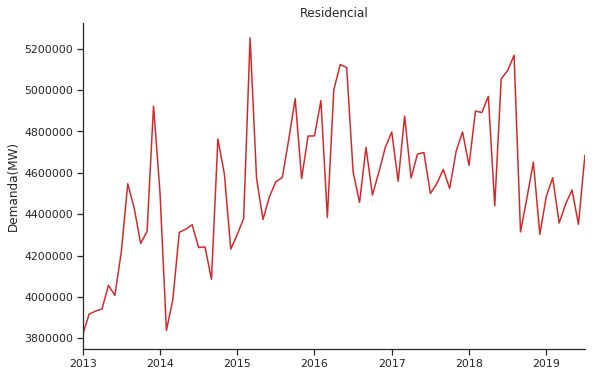

In [25]:
fig, ax= plt.subplots(figsize=(9,6))
decomposition.seasadj.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Demanda(MW)')
ax.set_title('Residencial')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

Utilizando el módulo <TT>plotting</TT> para graficar las componentes:

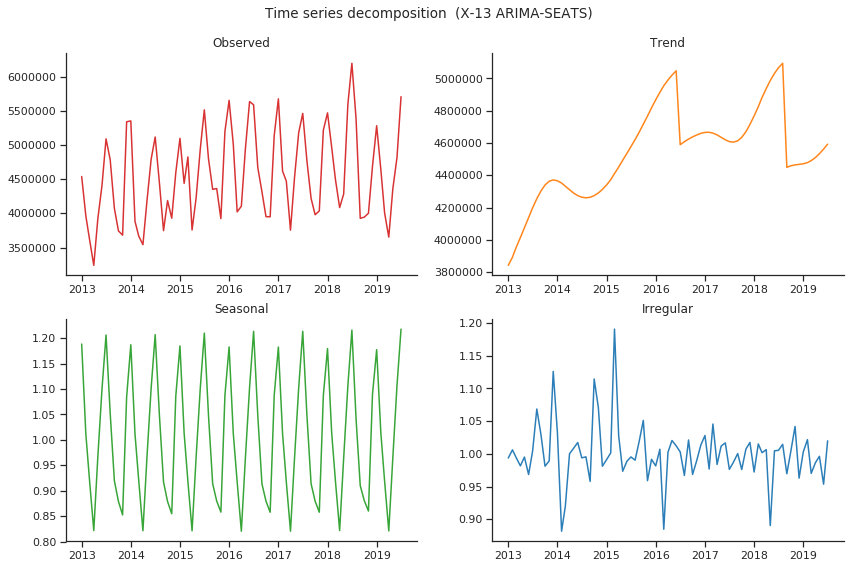

In [26]:
from plotting import plot_components_x13
plot_components_x13(decomposition)
plt.show()

In [27]:
##Guardamos el anáisis de la serie temporal en el siguiente archivo:
f=open('x13results-residencial.txt', mode='w+')
f.write(decomposition.results)
f.close()

### Método de corrección de tendencia por exponential smoothing

Se basa en la seasonally adjusted series for coherence. 

In [28]:
z=decomposition.seasadj.copy()
z.index=ts.index.to_period(freq='M')

In [29]:
model_sm = sm.tsa.Holt(z).fit()
smoothed_sm = model_sm.fittedvalues
mse_sm = sm.tools.eval_measures.rmse(z,smoothed_sm)
print(' In-sample fit:')
print(' RMSE               {0:.3f}'.format(mse_sm))
model_sm.summary()

 In-sample fit:
 RMSE               260801.097


Dep. Variable:,endog,No. Observations:,79
Model:,Holt,SSE,5373359756940.375
Optimized:,True,AIC,1978.499
Trend:,Additive,BIC,1987.977
Seasonal:,None,AICC,1979.666
Seasonal Periods:,None,Date:,"Sun, 06 Oct 2019"
Box-Cox:,False,Time:,21:15:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2961806,alpha,True
smoothing_slope,0.0435742,beta,True


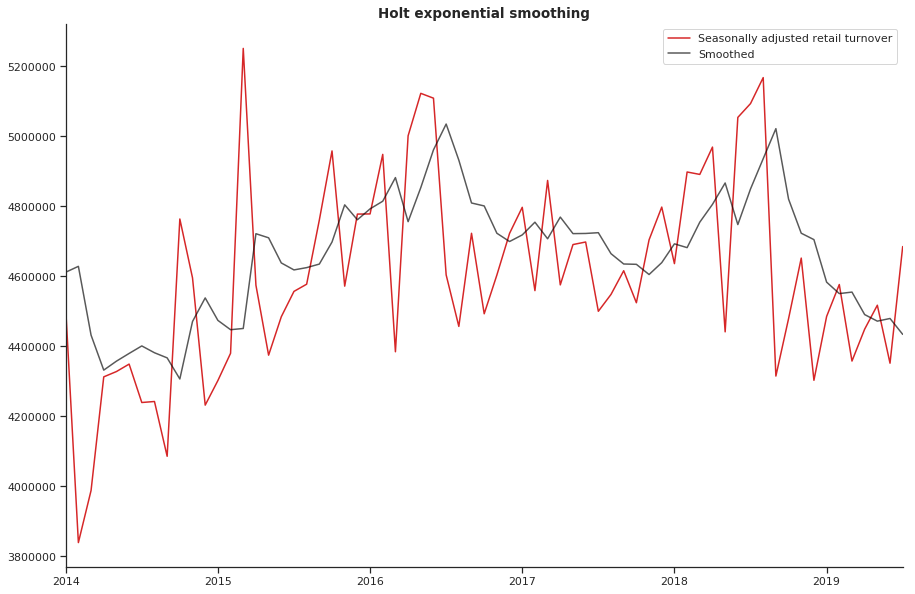

In [30]:
fig, ax= plt.subplots();#figsize=(9,6))

z['2014':].plot(color='#D62728', label='Seasonally adjusted retail turnover')
smoothed_sm['2014':].plot(color='black', label='Smoothed', alpha=0.65)
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Holt exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

/home/lucia/anaconda3/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/lucia/anaconda3/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/lucia/anaconda3/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


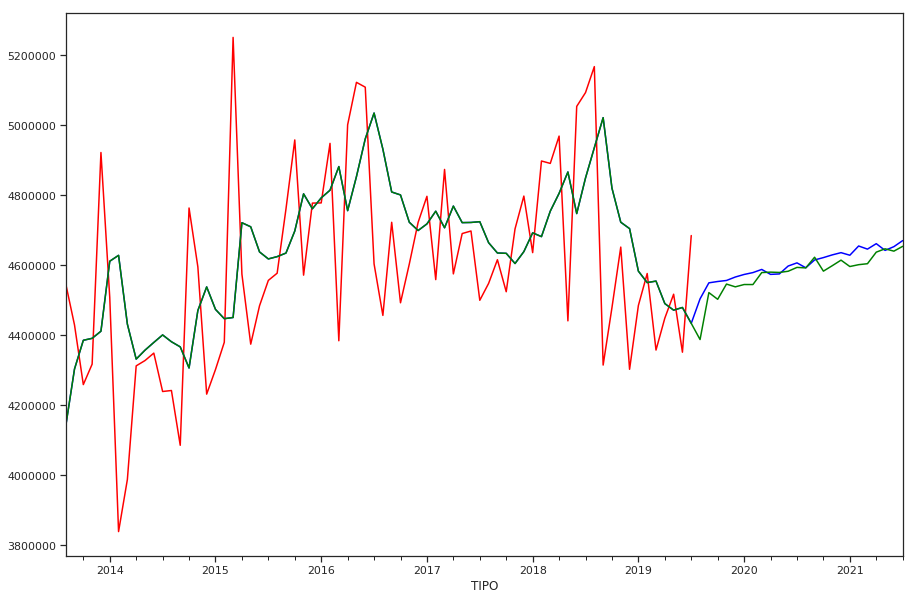

In [31]:
h=2*12 #M
w=h*3
data = z
model = sm.tsa.Holt
pred_index = data.index[-1] + np.array(range(1,h+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_fit = None
for i in range(0,h):
    current = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current).fit()
    if i==0:
        orig_fit = expanding.fittedvalues
    rolling = model(current.tail(w)).fit()
    pred_expanding.update(expanding.forecast(1))
    pred_rolling.update(rolling.forecast(1))
ax = data[-w:].plot(color='red');#figsize=(9,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_fit[-w:],pred_rolling]).plot(ax=ax,color='green');

## Holt-winters exponential smoothing


In [32]:
def hw_summary(model_sm):
    rmse_sm = sm.tools.eval_measures.rmse(model_sm.data.endog,model_sm.fittedvalues)
    print(' In-sample fit:')
    print(' RMSE               {0:.3f}'.format(rmse_sm))
    return model_sm.summary()

In [33]:
ahw_sm=sm.tsa.ExponentialSmoothing(y, trend='add', damped=False, 
                                   seasonal='add', seasonal_periods=12).fit()

In [34]:
hw_summary(ahw_sm)

 In-sample fit:
 RMSE               325530.419


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,8371634221242.382
Optimized:,True,AIC,2037.527
Trend:,Additive,BIC,2075.439
Seasonal:,Additive,AICC,2048.927
Seasonal Periods:,12,Date:,"Sun, 06 Oct 2019"
Box-Cox:,False,Time:,21:15:45
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1046688,alpha,True
smoothing_slope,3.7977e-12,beta,True


In [35]:
mhw_sm=sm.tsa.ExponentialSmoothing(y, trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()
hw_summary(mhw_sm)

 In-sample fit:
 RMSE               249758.948


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,4927983037661.804
Optimized:,True,AIC,1995.664
Trend:,Additive,BIC,2033.575
Seasonal:,Multiplicative,AICC,2007.064
Seasonal Periods:,12,Date:,"Sun, 06 Oct 2019"
Box-Cox:,False,Time:,21:15:46
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2749452,alpha,True
smoothing_slope,6.4208e-16,beta,True


In [36]:
mhw_damped=sm.tsa.ExponentialSmoothing(y, trend='add', damped=True, seasonal='mul', seasonal_periods=12).fit()
hw_summary(mhw_damped)

 In-sample fit:
 RMSE               250884.819


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,4972512204439.331
Optimized:,True,AIC,1998.374
Trend:,Additive,BIC,2038.655
Seasonal:,Multiplicative,AICC,2011.256
Seasonal Periods:,12,Date:,"Sun, 06 Oct 2019"
Box-Cox:,False,Time:,21:15:48
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2915957,alpha,True
smoothing_slope,0.0526318,beta,True


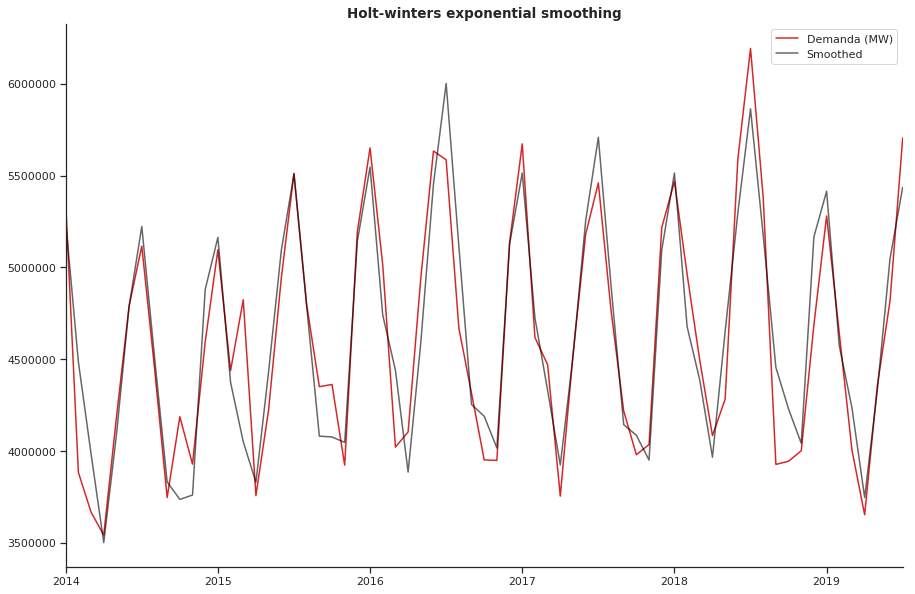

In [37]:
smoothed=pd.Series(mhw_sm.fittedvalues, index=y.index)

fig, ax= plt.subplots();#figsize=(9,6))

y['2014':].plot(color='#D62728', label='Demanda (MW)')
smoothed['2014':].plot(color='black', label='Smoothed', alpha=0.6)
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Holt-winters exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

Se puede ver que el ajuste es bastante cercano a la serie original

#### Model diagnostics


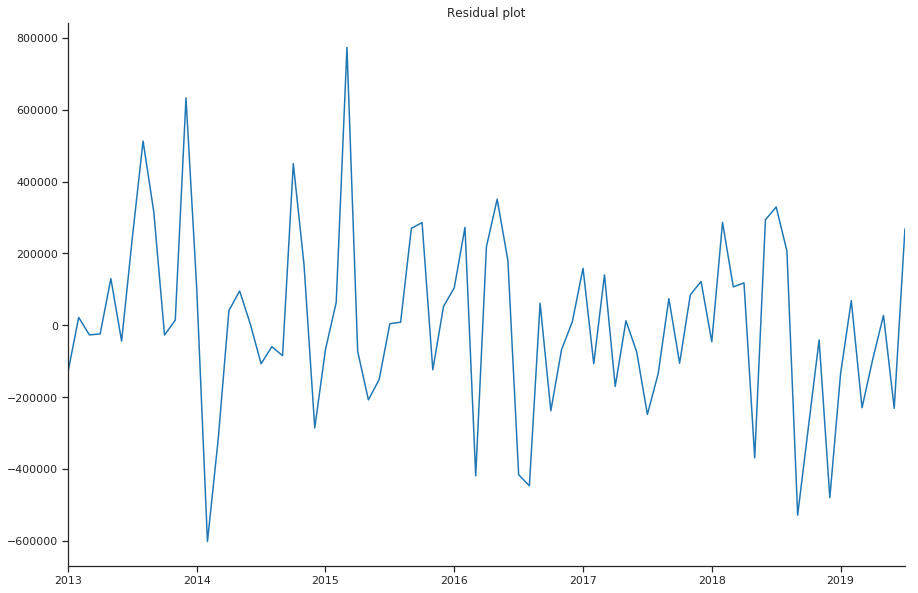

In [38]:
resid = (y-mhw_sm.fittedvalues)#[12:] # we remove the first 12 observations as they are for initialisitation only

fig, ax= plt.subplots();#figsize=(9,6))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

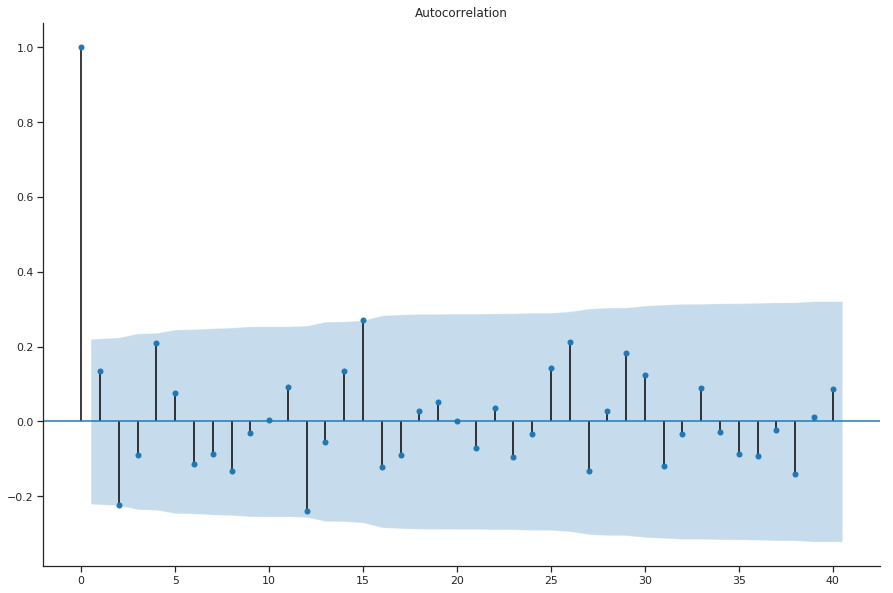

In [39]:
fig, ax = plt.subplots();#figsize=(9,6))
sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax)
sns.despine()
plt.show()

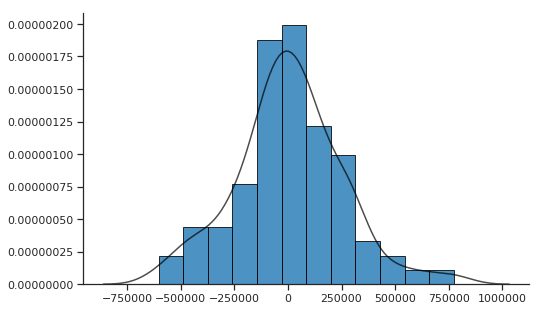

In [40]:
from plotting import histogram

histogram(resid)
plt.show()


Se puede ver que el gráfico de residuos, como su distribución casi normal y las  autocorrelaciones indican que los residuos representan casi ruido, por lo que estamos relizando una buena predicción.

#### Model validation de Holt-Winters


In [41]:
start_val = y.index[-round(len(y)/8*.2)*12]
start_val

Period('2017-08', 'M')

In [42]:
# Real time forecasting 

validation=y[start_val:].index
start = y.index.get_loc(start_val) 

pred1 = [] # seasonal random walk
pred2 = [] # additive holt winters
pred3 = [] # multiplicative holt winters
actual= []

for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value
    
    pred1.append(y.iloc[i-12]) # seasonal random walk forecast
    
    model = sm.tsa.ExponentialSmoothing(y.iloc[:i], trend='add', damped=False, seasonal='add', seasonal_periods=12).fit()
    pred2.append(model.forecast(1)[0]) # additive holt winters forecast
    
    model = sm.tsa.ExponentialSmoothing(y.iloc[:i], trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()
    pred3.append(model.forecast(1)[0]) # multiplicate holt winters forecast
    

columns=['Seasonal RW', 'Additive', 'Multiplicative', 'Actual']
results = np.vstack([pred1,pred2,pred3,actual]).T
results = pd.DataFrame(results, columns=columns, index=validation)

/home/lucia/anaconda3/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/lucia/anaconda3/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/lucia/anaconda3/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/lucia/anaconda3/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


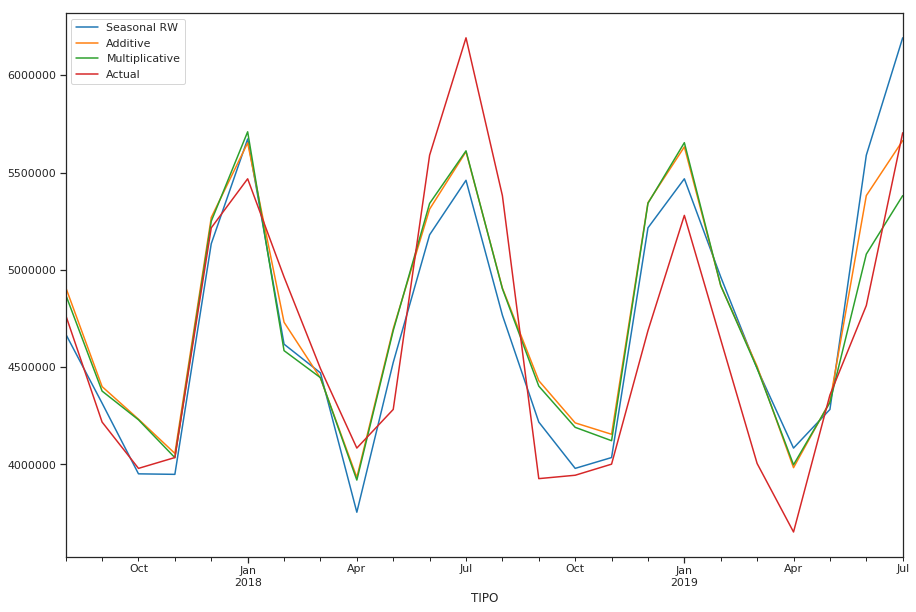

In [43]:
results.plot();

In [44]:
from scipy import stats

table = pd.DataFrame(0.0, index=results.columns[:-1], columns=['RMSE','SE'])
for i in range(len(results.columns)-1):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results.iloc[:,i], results.iloc[:,-1])
    table.iloc[i,1] = (results.iloc[:,i] - results.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
Seasonal RW,366021.598,75477.061
Additive,336398.042,65061.835
Multiplicative,329480.239,66030.771


#### Forecast

Generamos una predicción a dos años basándonos en el modelo seleccionado: 

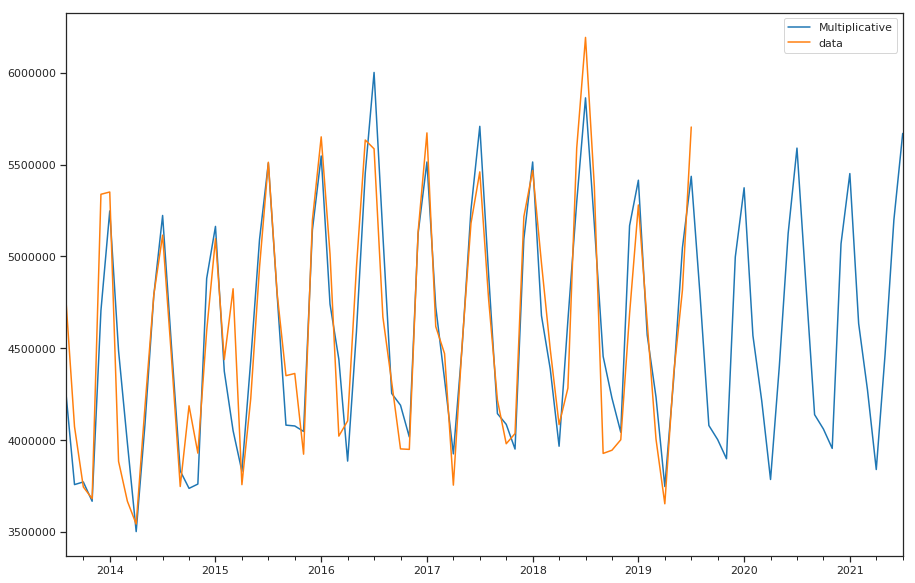

In [45]:
h=2*12 #M
w=h*3

model = sm.tsa.ExponentialSmoothing(y, 
                    trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()

plot = pd.DataFrame()
plot['Multiplicative'] = pd.concat([model.fittedvalues, model.forecast(h)])
plot['data'] = y

plot[-(w+h):].plot();#figsize=(9,6))

Esta es la serie de consumos Residenciales, se predice que continuará con su comportamiento seasonal, pero como se espera en la parte comercial e industrial? 

#### Comercial

In [46]:
data = pd.read_csv(DATA_FILE,index_col='TIPO',parse_dates=True)
#data.index=data.index.to_period(freq='M')
#data.columns


In [47]:
y = data['Comercial'].copy() # Month period series
y.index = y.index.to_period(freq='M')

ts = data['Comercial'] # Day indexed series

In [48]:
decomposition = sm.tsa.x13_arima_analysis(ts,x12path='.')

Para una mejor representación de los componentes:

In [49]:
#You can use the <TT>dir</TT> method to check the available output. 
[attr for attr in dir(decomposition) if not attr.startswith('_')]

['irregular', 'observed', 'plot', 'results', 'seasadj', 'stdout', 'trend']

In [50]:
#decomposition.seasadj.tail()

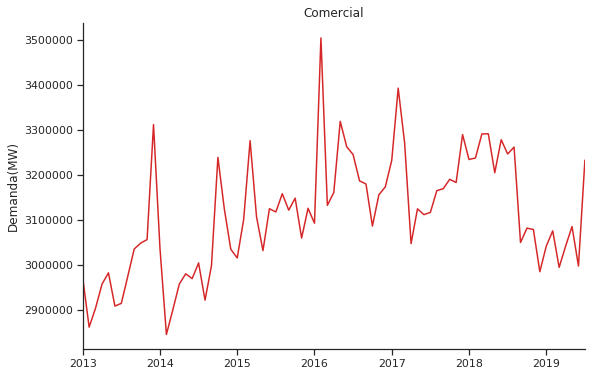

In [51]:
fig, ax= plt.subplots(figsize=(9,6))
decomposition.seasadj.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Demanda(MW)')
ax.set_title('Comercial')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

Utilizando el módulo <TT>plotting</TT> para graficar las componentes:

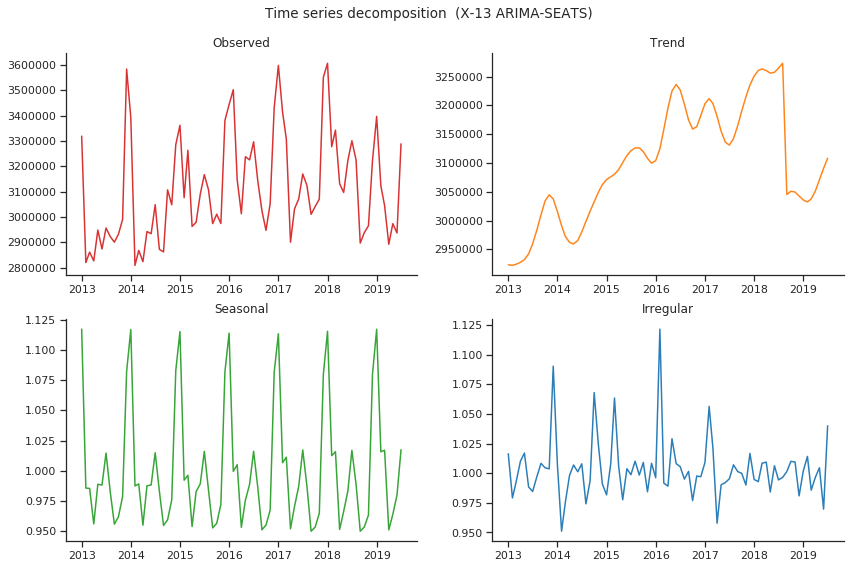

In [52]:
from plotting import plot_components_x13
plot_components_x13(decomposition)
plt.show()

In [53]:
##Guardamos el anáisis de la serie temporal en el siguiente archivo:
f=open('x13results-comercial.txt', mode='w+')
f.write(decomposition.results)
f.close()

### Método de corrección de tendencia por exponential smoothing

Se basa en la seasonally adjusted series for coherence. 

In [54]:
z=decomposition.seasadj.copy()
z.index=ts.index.to_period(freq='M')

In [55]:
model_sm = sm.tsa.Holt(z).fit()
smoothed_sm = model_sm.fittedvalues
mse_sm = sm.tools.eval_measures.rmse(z,smoothed_sm)
print(' In-sample fit:')
print(' RMSE               {0:.3f}'.format(mse_sm))
model_sm.summary()

 In-sample fit:
 RMSE               101677.628


Dep. Variable:,endog,No. Observations:,79
Model:,Holt,SSE,816728864652.423
Optimized:,True,AIC,1829.671
Trend:,Additive,BIC,1839.149
Seasonal:,None,AICC,1830.838
Seasonal Periods:,None,Date:,"Sun, 06 Oct 2019"
Box-Cox:,False,Time:,21:16:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3236113,alpha,True
smoothing_slope,0.000000,beta,True


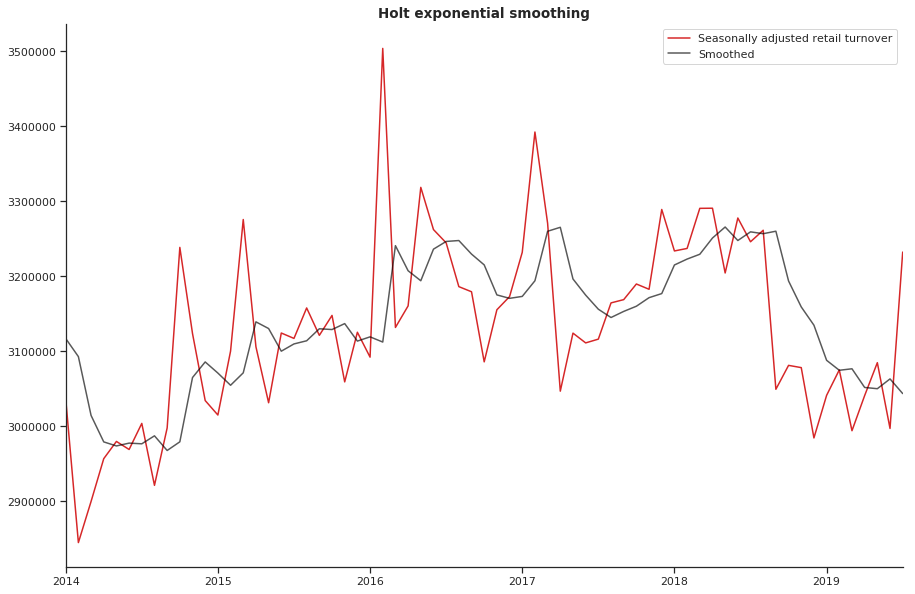

In [56]:
fig, ax= plt.subplots();#figsize=(9,6))

z['2014':].plot(color='#D62728', label='Seasonally adjusted retail turnover')
smoothed_sm['2014':].plot(color='black', label='Smoothed', alpha=0.65)
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Holt exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

/home/lucia/anaconda3/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


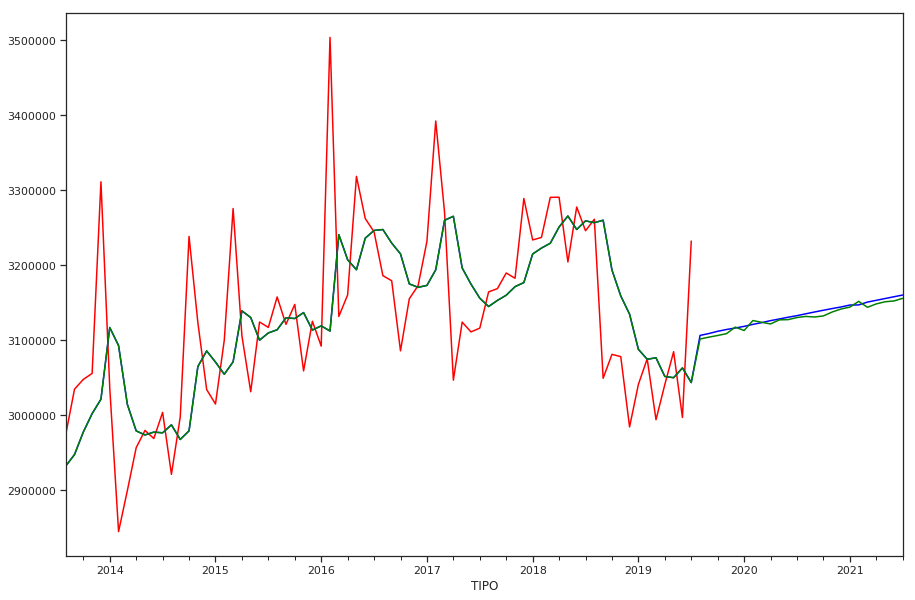

In [57]:
h=2*12 #M
w=h*3
data = z
model = sm.tsa.Holt
pred_index = data.index[-1] + np.array(range(1,h+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_fit = None
for i in range(0,h):
    current = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current).fit()
    if i==0:
        orig_fit = expanding.fittedvalues
    rolling = model(current.tail(w)).fit()
    pred_expanding.update(expanding.forecast(1))
    pred_rolling.update(rolling.forecast(1))
ax = data[-w:].plot(color='red');#figsize=(9,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_fit[-w:],pred_rolling]).plot(ax=ax,color='green');

## Holt-winters exponential smoothing


In [58]:
def hw_summary(model_sm):
    rmse_sm = sm.tools.eval_measures.rmse(model_sm.data.endog,model_sm.fittedvalues)
    print(' In-sample fit:')
    print(' RMSE               {0:.3f}'.format(rmse_sm))
    return model_sm.summary()

In [59]:
ahw_sm=sm.tsa.ExponentialSmoothing(y, trend='add', damped=False, 
                                   seasonal='add', seasonal_periods=12).fit()

In [60]:
hw_summary(ahw_sm)

 In-sample fit:
 RMSE               122256.819


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,1180791660847.450
Optimized:,True,AIC,1882.793
Trend:,Additive,BIC,1920.704
Seasonal:,Additive,AICC,1894.193
Seasonal Periods:,12,Date:,"Sun, 06 Oct 2019"
Box-Cox:,False,Time:,21:16:14
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2153242,alpha,True
smoothing_slope,1.8469e-10,beta,True


In [61]:
mhw_sm=sm.tsa.ExponentialSmoothing(y, trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()
hw_summary(mhw_sm)

 In-sample fit:
 RMSE               105239.899


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,874959467635.477
Optimized:,True,AIC,1859.112
Trend:,Additive,BIC,1897.023
Seasonal:,Multiplicative,AICC,1870.512
Seasonal Periods:,12,Date:,"Sun, 06 Oct 2019"
Box-Cox:,False,Time:,21:16:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3397291,alpha,True
smoothing_slope,5.8967e-14,beta,True


In [62]:
mhw_damped=sm.tsa.ExponentialSmoothing(y, trend='add', damped=True, seasonal='mul', seasonal_periods=12).fit()
hw_summary(mhw_damped)

 In-sample fit:
 RMSE               120298.567


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,1143267872518.632
Optimized:,True,AIC,1882.242
Trend:,Additive,BIC,1922.522
Seasonal:,Multiplicative,AICC,1895.123
Seasonal Periods:,12,Date:,"Sun, 06 Oct 2019"
Box-Cox:,False,Time:,21:16:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2105263,alpha,True
smoothing_slope,0.2105263,beta,True


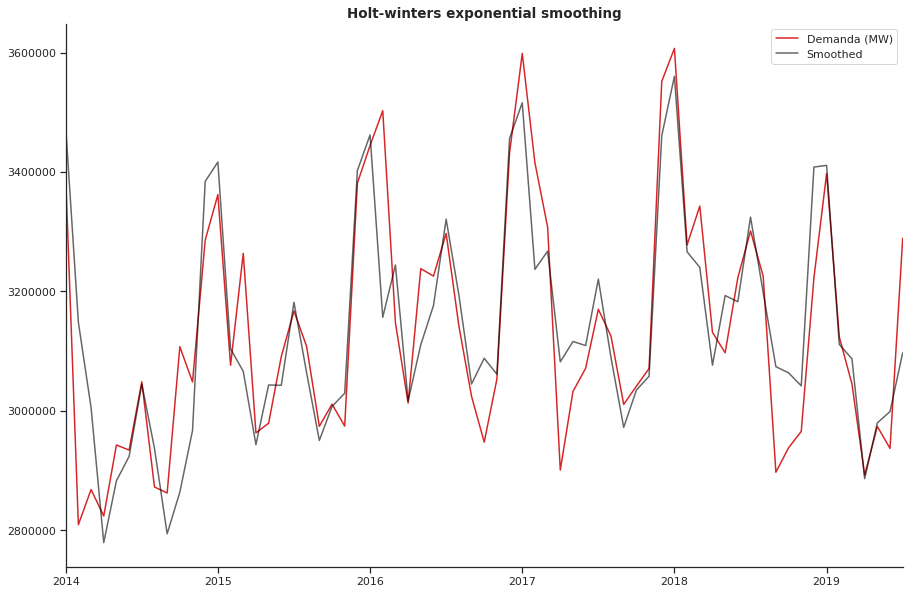

In [63]:
smoothed=pd.Series(mhw_sm.fittedvalues, index=y.index)

fig, ax= plt.subplots();#figsize=(9,6))

y['2014':].plot(color='#D62728', label='Demanda (MW)')
smoothed['2014':].plot(color='black', label='Smoothed', alpha=0.6)
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Holt-winters exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

Se puede ver que el ajuste es bastante cercano a la serie original

#### Model diagnostics


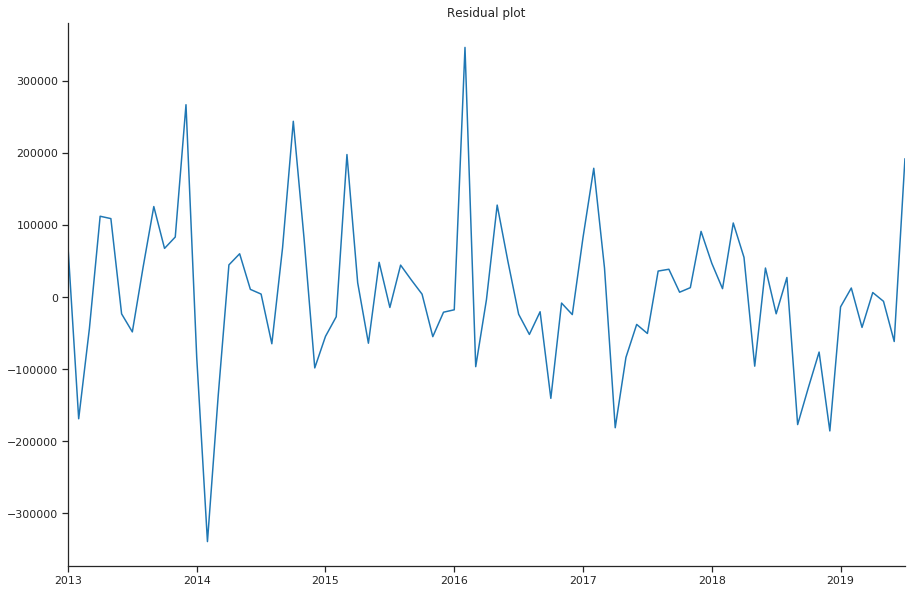

In [64]:
resid = (y-mhw_sm.fittedvalues)#[12:] # we remove the first 12 observations as they are for initialisitation only

fig, ax= plt.subplots();#figsize=(9,6))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

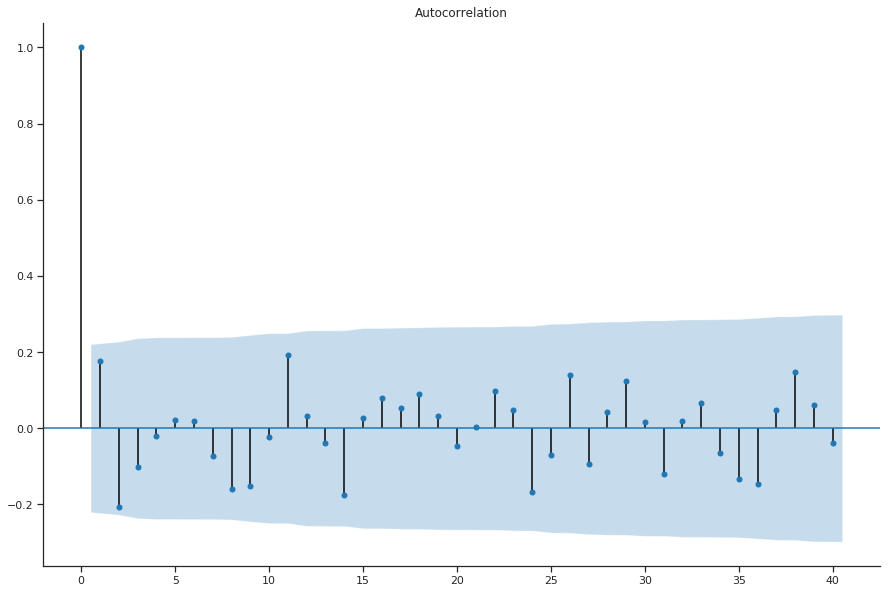

In [65]:
fig, ax = plt.subplots();#figsize=(9,6))
sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax)
sns.despine()
plt.show()

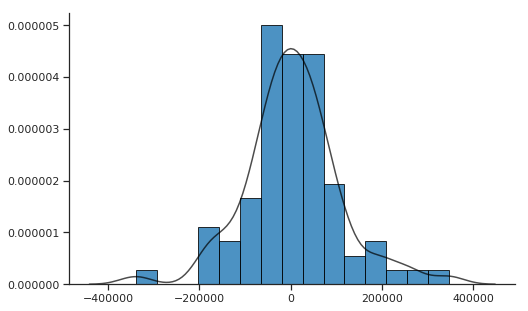

In [66]:
from plotting import histogram

histogram(resid)
plt.show()


Se puede ver que el gráfico de residuos que nuestra predicción no es tan confiable como en el caso de la demanda residencial

#### Model validation de Holt-Winters


In [67]:
start_val = y.index[-round(len(y)/8*.2)*12]
start_val

Period('2017-08', 'M')

In [68]:
# Real time forecasting 

validation=y[start_val:].index
start = y.index.get_loc(start_val) 

pred1 = [] # seasonal random walk
pred2 = [] # additive holt winters
pred3 = [] # multiplicative holt winters
actual= []

for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value
    
    pred1.append(y.iloc[i-12]) # seasonal random walk forecast
    
    model = sm.tsa.ExponentialSmoothing(y.iloc[:i], trend='add', damped=False, seasonal='add', seasonal_periods=12).fit()
    pred2.append(model.forecast(1)[0]) # additive holt winters forecast
    
    model = sm.tsa.ExponentialSmoothing(y.iloc[:i], trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()
    pred3.append(model.forecast(1)[0]) # multiplicate holt winters forecast
    

columns=['Seasonal RW', 'Additive', 'Multiplicative', 'Actual']
results = np.vstack([pred1,pred2,pred3,actual]).T
results = pd.DataFrame(results, columns=columns, index=validation)

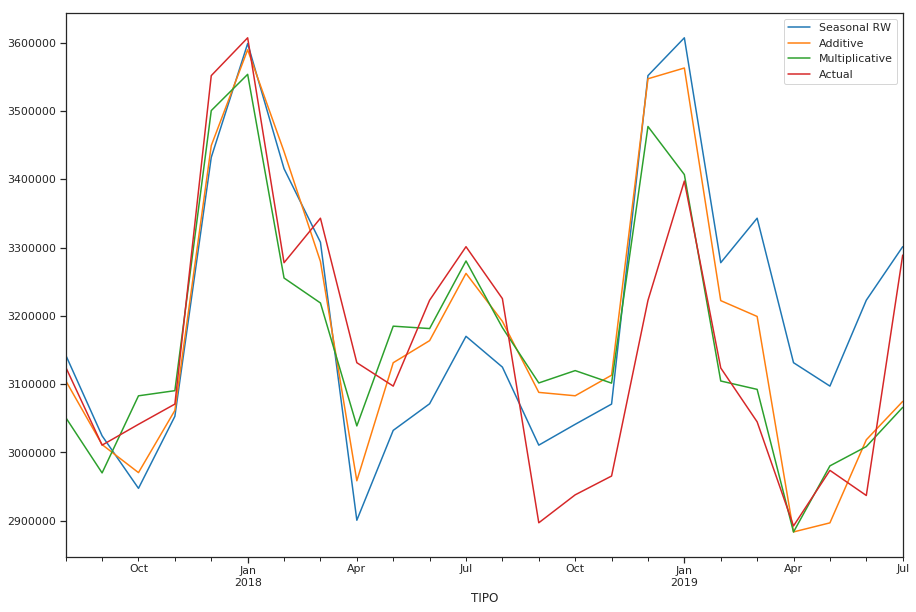

In [69]:
results.plot();

In [70]:
from scipy import stats

table = pd.DataFrame(0.0, index=results.columns[:-1], columns=['RMSE','SE'])
for i in range(len(results.columns)-1):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results.iloc[:,i], results.iloc[:,-1])
    table.iloc[i,1] = (results.iloc[:,i] - results.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
Seasonal RW,158818.230,31463.076
Additive,127106.797,25953.931
Multiplicative,105418.545,21875.729


#### Forecast

Generamos una predicción a dos años basándonos en el modelo seleccionado: 

In [ ]:
h=2*12 #M
w=h*3

model = sm.tsa.ExponentialSmoothing(y, 
                    trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()

plot = pd.DataFrame()
plot['Multiplicative'] = pd.concat([model.fittedvalues, model.forecast(h)])
plot['data'] = y

plot[-(w+h):].plot();#figsize=(9,6))

#### Industrial

In [ ]:
data = pd.read_csv(DATA_FILE,index_col='TIPO',parse_dates=True)
data.rename(columns={'Industrial/Comercial Grande':'Industrial'}, inplace=True )
data.columns
#data.tail()

#data.index=data.index.to_period(freq='M')
#


In [ ]:
y = data['Industrial'].copy() # Month period series
y.index = y.index.to_period(freq='M')

ts = data['Industrial'] # Day indexed series

In [ ]:
decomposition = sm.tsa.x13_arima_analysis(ts,x12path='.')

Para una mejor representación de los componentes:

In [ ]:
#You can use the <TT>dir</TT> method to check the available output. 
[attr for attr in dir(decomposition) if not attr.startswith('_')]

In [ ]:
#decomposition.seasadj.tail()

In [ ]:
fig, ax= plt.subplots(figsize=(9,6))
decomposition.seasadj.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Demanda(MW)')
ax.set_title('Comercial')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

Utilizando el módulo <TT>plotting</TT> para graficar las componentes:

In [ ]:
from plotting import plot_components_x13
plot_components_x13(decomposition)
plt.show()

In [ ]:
##Guardamos el anáisis de la serie temporal en el siguiente archivo:
f=open('x13results-industrial.txt', mode='w+')
f.write(decomposition.results)
f.close()

### Método de corrección de tendencia por exponential smoothing

Se basa en la seasonally adjusted series for coherence. 

In [ ]:
z=decomposition.seasadj.copy()
z.index=ts.index.to_period(freq='M')

In [ ]:
model_sm = sm.tsa.Holt(z).fit()
smoothed_sm = model_sm.fittedvalues
mse_sm = sm.tools.eval_measures.rmse(z,smoothed_sm)
print(' In-sample fit:')
print(' RMSE               {0:.3f}'.format(mse_sm))
model_sm.summary()

In [ ]:
fig, ax= plt.subplots();#figsize=(9,6))

z['2014':].plot(color='#D62728', label='Seasonally adjusted retail turnover')
smoothed_sm['2014':].plot(color='black', label='Smoothed', alpha=0.65)
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Holt exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

In [ ]:
h=2*12 #M
w=h*3
data = z
model = sm.tsa.Holt
pred_index = data.index[-1] + np.array(range(1,h+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_fit = None
for i in range(0,h):
    current = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current).fit()
    if i==0:
        orig_fit = expanding.fittedvalues
    rolling = model(current.tail(w)).fit()
    pred_expanding.update(expanding.forecast(1))
    pred_rolling.update(rolling.forecast(1))
ax = data[-w:].plot(color='red');#figsize=(9,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_fit[-w:],pred_rolling]).plot(ax=ax,color='green');

## Holt-winters exponential smoothing


In [ ]:
def hw_summary(model_sm):
    rmse_sm = sm.tools.eval_measures.rmse(model_sm.data.endog,model_sm.fittedvalues)
    print(' In-sample fit:')
    print(' RMSE               {0:.3f}'.format(rmse_sm))
    return model_sm.summary()

In [ ]:
ahw_sm=sm.tsa.ExponentialSmoothing(y, trend='add', damped=False, 
                                   seasonal='add', seasonal_periods=12).fit()

In [ ]:
hw_summary(ahw_sm)

In [ ]:
mhw_sm=sm.tsa.ExponentialSmoothing(y, trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()
hw_summary(mhw_sm)

In [ ]:
mhw_damped=sm.tsa.ExponentialSmoothing(y, trend='add', damped=True, seasonal='mul', seasonal_periods=12).fit()
hw_summary(mhw_damped)

In [ ]:
smoothed=pd.Series(mhw_sm.fittedvalues, index=y.index)

fig, ax= plt.subplots();#figsize=(9,6))

y['2014':].plot(color='#D62728', label='Demanda (MW)')
smoothed['2014':].plot(color='black', label='Smoothed', alpha=0.6)
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Holt-winters exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

Se puede ver que el ajuste es bastante cercano a la serie original

#### Model diagnostics


In [ ]:
resid = (y-mhw_sm.fittedvalues)#[12:] # we remove the first 12 observations as they are for initialisitation only

fig, ax= plt.subplots();#figsize=(9,6))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

In [ ]:
fig, ax = plt.subplots();#figsize=(9,6))
sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax)
sns.despine()
plt.show()

In [ ]:
from plotting import histogram

histogram(resid)
plt.show()


Se puede ver que el gráfico de residuos que nuestra predicción no es tan confiable como en el caso de la demanda residencial

#### Model validation de Holt-Winters


In [ ]:
start_val = y.index[-round(len(y)/8*.2)*12]
start_val

In [ ]:
# Real time forecasting 

validation=y[start_val:].index
start = y.index.get_loc(start_val) 

pred1 = [] # seasonal random walk
pred2 = [] # additive holt winters
pred3 = [] # multiplicative holt winters
actual= []

for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value
    
    pred1.append(y.iloc[i-12]) # seasonal random walk forecast
    
    model = sm.tsa.ExponentialSmoothing(y.iloc[:i], trend='add', damped=False, seasonal='add', seasonal_periods=12).fit()
    pred2.append(model.forecast(1)[0]) # additive holt winters forecast
    
    model = sm.tsa.ExponentialSmoothing(y.iloc[:i], trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()
    pred3.append(model.forecast(1)[0]) # multiplicate holt winters forecast
    

columns=['Seasonal RW', 'Additive', 'Multiplicative', 'Actual']
results = np.vstack([pred1,pred2,pred3,actual]).T
results = pd.DataFrame(results, columns=columns, index=validation)

In [ ]:
results.plot();

In [ ]:
from scipy import stats

table = pd.DataFrame(0.0, index=results.columns[:-1], columns=['RMSE','SE'])
for i in range(len(results.columns)-1):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results.iloc[:,i], results.iloc[:,-1])
    table.iloc[i,1] = (results.iloc[:,i] - results.iloc[:,-1]).sem()
table.round(3)

#### Forecast

Generamos una predicción a dos años basándonos en el modelo seleccionado: 

In [ ]:
h=2*12 #M
w=h*3

model = sm.tsa.ExponentialSmoothing(y, 
                    trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()

plot = pd.DataFrame()
plot['Multiplicative'] = pd.concat([model.fittedvalues, model.forecast(h)])
plot['data'] = y

plot[-(w+h):].plot();#figsize=(9,6))

Se predice que el consumo industrial está en descenso pero se alcanzarían unas oscilaciones alrededor de un cierto valor medio. 